In [1]:
%pip install --upgrade google-cloud-aiplatform

Note: you may need to restart the kernel to use updated packages.


In [1]:
!gcloud auth application-default login

Your browser has been opened to visit:

    https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=764086051850-6qr4p6gpi6hn506pt8ejuq83di341hur.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A8085%2F&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcloud-platform+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fsqlservice.login&state=4Xh0b87gJEOwwUCGsfWZI1tl8ZNLW3&access_type=offline&code_challenge=1ljLKX1dPmDAGh2prT0c_Z0rXh6RmNz_llCz1F62NS0&code_challenge_method=S256


Credentials saved to file: [C:\Users\bvandrunen\AppData\Roaming\gcloud\application_default_credentials.json]

These credentials will be used by any library that requests Application Default Credentials (ADC).

Quota project "dttl-nl-genai-sandbox" was added to ADC which can be used by Google client libraries for billing and quota. Note that some services may still bill the project owning the resource.


In [112]:
import base64
import vertexai
from vertexai.generative_models import GenerativeModel, SafetySetting, Part, GenerationConfig, upload_file


def multiturn_generate_content():
    vertexai.init(project="dttl-nl-genai-sandbox", location="europe-west4")
    model = GenerativeModel(
        "gemini-1.5-flash-002",
    )
    chat = model.start_chat()
    return chat


generation_config = {
    "max_output_tokens": 8192,
    "temperature": 1,
    "top_p": 0.95,
}

safety_settings = [
    SafetySetting(
        category=SafetySetting.HarmCategory.HARM_CATEGORY_HATE_SPEECH,
        threshold=SafetySetting.HarmBlockThreshold.OFF
    ),
    SafetySetting(
        category=SafetySetting.HarmCategory.HARM_CATEGORY_DANGEROUS_CONTENT,
        threshold=SafetySetting.HarmBlockThreshold.OFF
    ),
    SafetySetting(
        category=SafetySetting.HarmCategory.HARM_CATEGORY_SEXUALLY_EXPLICIT,
        threshold=SafetySetting.HarmBlockThreshold.OFF
    ),
    SafetySetting(
        category=SafetySetting.HarmCategory.HARM_CATEGORY_HARASSMENT,
        threshold=SafetySetting.HarmBlockThreshold.OFF
    ),
]

x = multiturn_generate_content()



ImportError: cannot import name 'upload_file' from 'vertexai.generative_models' (c:\Users\bvandrunen\AppData\Local\miniconda3\Lib\site-packages\vertexai\generative_models\__init__.py)

In [8]:

print(x.send_message(
        ["""Can you provide me with a small alinea on explaining the impact of not eating meat"""],
        generation_config=generation_config,
        safety_settings=safety_settings))

candidates {
  content {
    role: "model"
    parts {
      text: "Eliminating meat from one\'s diet can have significant impacts, both environmentally and on personal health.  Environmentally, it reduces greenhouse gas emissions associated with livestock farming and land use.  Health-wise, it can lead to lower risks of heart disease, type 2 diabetes, and some cancers, though careful planning is necessary to ensure adequate intake of essential nutrients like iron and vitamin B12.\n"
    }
  }
  finish_reason: STOP
  avg_logprobs: -0.230890971858327
}
usage_metadata {
  prompt_token_count: 16
  candidates_token_count: 82
  total_token_count: 98
}
model_version: "gemini-1.5-flash-002"



In [30]:
def information(systemInstruction, message, image=None):
    gemini_model = GenerativeModel("gemini-1.5-flash-002", system_instruction=[systemInstruction])
    generation_config1 = GenerationConfig(**generation_config)

    model_response = gemini_model.generate_content([message], generation_config=generation_config1, safety_settings=safety_settings)
    return model_response.text




In [32]:
information(systemInstruction="write in 1 sentence", message="Can you provide me with a small alinea on explaining the impact of not eating meat")

'Eliminating meat from your diet can have several positive impacts, including improved heart health, reduced risk of certain cancers, lower environmental footprint, and potential weight management benefits, depending on the replacement foods chosen.\n'

In [113]:
import PIL.Image
from IPython.display import Image
from IPython.core.display import HTML

def information(systemInstruction, message, image):
    gemini_model = GenerativeModel("gemini-1.5-flash-002", system_instruction=[systemInstruction])
    organ = PIL.Image.open(image)
    #organ = Image(image)
    input_image = [message, organ]

    generation_config1 = GenerationConfig(**generation_config)

    model_response = gemini_model.generate_content(input_image, generation_config=generation_config1, safety_settings=safety_settings)
    return model_response.text

image_path = "flower.jpg"
information(systemInstruction="write in 1 sentence", message="can you identify what picture this is", image=image_path)

TypeError: Unexpected item type: <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=2634x2718 at 0x20B034441A0>.Only types that represent a single Content or a single Part are supported here.

In [109]:
import PIL.Image
from IPython.display import Image
from IPython.core.display import HTML

myfile = genai.upload_file(media / "kleineFlower.jpg")
print(f"{myfile=}")

model = GenerativeModel("gemini-1.5-flash")
organ = PIL.Image.open("kleineFlower.jpg")
#organ = Image('flower.jpg')
response = model.generate_content(["Tell me about this instrument", organ], stream=True)
#response = model.generate_content(organ.any())
print(response.text)

AttributeError: 'generator' object has no attribute 'text'

In [115]:
%pip install google-generativeai

   ---------------------------------------- 0.0/153.4 kB ? eta -:--:--
   -------- ------------------------------- 30.7/153.4 kB ? eta -:--:--
   ------------------------------------- -- 143.4/153.4 kB 2.8 MB/s eta 0:00:01
   ---------------------------------------- 153.4/153.4 kB 1.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/760.0 kB ? eta -:--:--
   ------------ --------------------------- 235.5/760.0 kB 7.0 MB/s eta 0:00:01
   -------------------- ------------------- 389.1/760.0 kB 4.9 MB/s eta 0:00:01
   ---------------------------------- ----- 655.4/760.0 kB 4.6 MB/s eta 0:00:01
   ---------------------------------------- 760.0/760.0 kB 4.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/12.2 MB ? eta -:--:--
    --------------------------------------- 0.2/12.2 MB 7.6 MB/s eta 0:00:02
   - -------------------------------------- 0.5/12.2 MB 6.2 MB/s eta 0:00:02
   -- ------------------------------------- 0.7/12.2 MB 5.9 MB/s eta 0:00:02
   --

In [116]:
import google.generativeai as genai

myfile = genai.upload_file(media / "kleineFlower.jpg")
print(f"{myfile=}")

model = genai.GenerativeModel("gemini-1.5-flash")
result = model.generate_content(
    [myfile, "\n\n", "Can you tell me about the instruments in this photo?"]
)
print(f"{result.text=}")

c:\Users\bvandrunen\AppData\Local\miniconda3\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


NameError: name 'media' is not defined

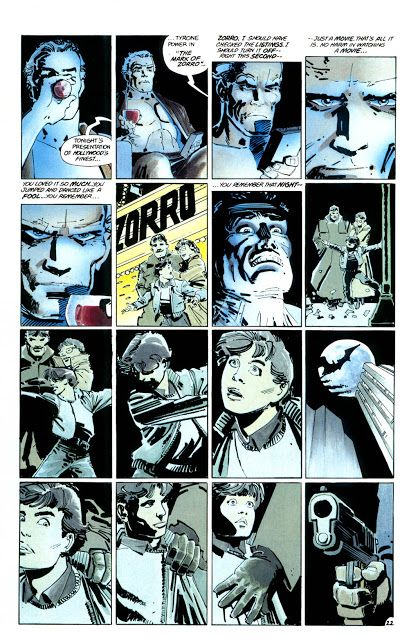

In [94]:
import urllib.request
# Opening the image for Image Understanding
urllib.request.urlretrieve(
    'https://i.postimg.cc/x1XnKCvV/RxsIzEy.png',
   "comic.png")
imageInternet = PIL.Image.open('comic.png')
imageInternet

In [101]:
for m in list_models():
    if "generateContent" in m.supported_generation_methods:
        print(m.name)

NameError: name 'list_models' is not defined

In [99]:
model = GenerativeModel("gemini-pro-vision")
def to_markdown(text):
    text = text.replace("•", "  *")
    return Markdown(textwrap.indent(text, "> ", predicate=lambda _: True))
response = model.generate_content(image)
to_markdown(response.text)

response = model.generate_content(
    ["Write an explanation based on the image, give the name of the author and the book that it is from", image],
    stream=True
)
response.resolve()
to_markdown(response.text)

TypeError: Unexpected value type: <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=409x640 at 0x20B77D82900>

In [106]:

image_path = "53_D.png"  
img = PIL.Image.open(image_path)

print(img.png.__dict__)

{'fp': <_io.BufferedReader name='C:\\Users\\bvandrunen\\OneDrive - Deloitte (O365D)\\Documents\\Thesis_Code\\53_D.png'>, 'queue': [], 'im_info': {}, 'im_text': {}, 'im_size': (2048, 2048), 'im_mode': 'RGB', 'im_tile': [('zip', (0, 0, 2048, 2048), 41, 'RGB')], 'im_palette': None, 'im_custom_mimetype': None, 'im_n_frames': None, '_seq_num': None, 'rewind_state': None, 'text_memory': 0, 'im_rawmode': 'RGB', 'im_idat': 65536}
